In [17]:
%matplotlib inline
import numpy as np
import scipy as sp
from scipy import io
import matplotlib.pyplot as plt
import os
import sys

sys.path.append('/Users/rgao/Documents/Code/research/neurodsp/')
from neurodsp import spectral
import neurodsp as ndsp

In [18]:
datafile = '/Users/rgao/Documents/Data/Kahana/RAMPhase1_FR_Clean/R1020J_FR1_data_-800_2400.mat'
data = io.loadmat(datafile, squeeze_me=True)

Kahana Trialinfo Columns
- (1) taskphase - phase of the experiment, encoding = 1, recall = 2
- (2) stim           - indicating whether stimulation was present during encoding (1 = yes, 0 = no) (in case of recall, during encoding of the recalled word)
- (3) subseqmem  - subsequent memory effect, for encoding: later remembered = 1, later forgotten =  0; for recall: 1 = successfully remembered, 0 = new word
- (4) list  - list number (i.e. task phase)
- (5) serialpos - serial position of word in list during encoding (for recall, NaN in case of new word)
- (6) wordno - numeric identifier of word presented/recalled (for recall, NaN in case of new word)
- (7) timefromprev  - time in seconds from begsample till previous event (positive indicates overlap)
- (8) timetonext - time in seconds from endsample till next event     (negative indicates overlap)

In [36]:
x = data['dat']
fs = data['srate']
outcome = data['trialinfo'][:,2]

In [37]:
P = np.abs(np.fft.fft(x[:,:800,:], n=int(fs), axis=1))**2.
np.shape(P)

(59, 1000, 283)

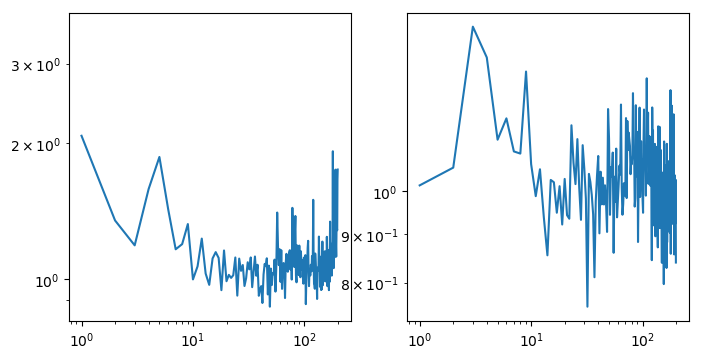

In [72]:
scv_0 = np.squeeze(np.std(P[:,:200,np.where(outcome==0)], axis=-1)/np.mean(P[:,:200,np.where(outcome==0)], axis=-1)).T
scv_1 = np.squeeze(np.std(P[:,:200,np.where(outcome==1)], axis=-1)/np.mean(P[:,:200,np.where(outcome==1)], axis=-1)).T

chan = 10
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.loglog(scv_0[:,chan])
plt.subplot(1,2,2)
plt.loglog(scv_1[:,chan]);

(0.5, 2)

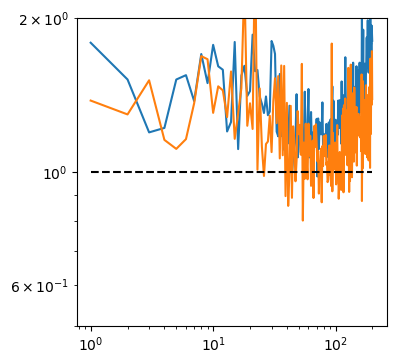

In [75]:
chan = 26
plt.loglog(scv_0[:,chan])
plt.loglog(scv_1[:,chan]);
plt.plot([1,200],[1,1], 'k--')
plt.ylim([0.5, 2])